<a href="https://colab.research.google.com/github/Girishgh7/project-p1/blob/main/learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100)

# Make predictions
predictions = model.predict(X)

# Print the predictions
print(predictions)


Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 8.3275
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 6.8656
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 5.6429
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 4.6791
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 3.8341
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 3.2726
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 2.7832
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 2.4276
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0545
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7483
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.4973
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2989
Epoch 13/100
4/4 [==============================] - 0s 3ms/st

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
over=RandomOverSampler()
x,y=over.fit_resample(x,y)
data=np.hstack((x,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [ ]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.6,random_state=0)

In [ ]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(16,activation='relu'),
      tf.keras.layers.Dense(16,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

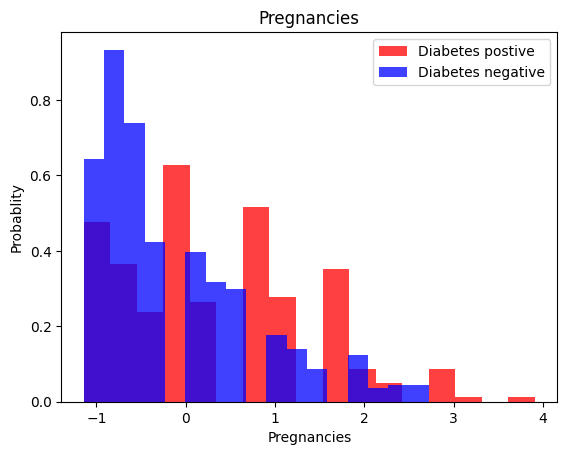

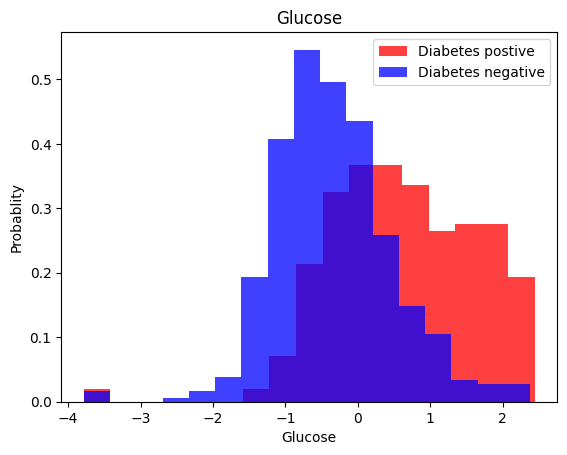

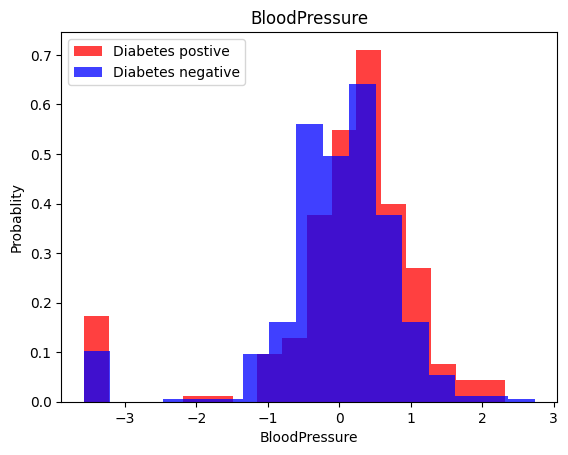

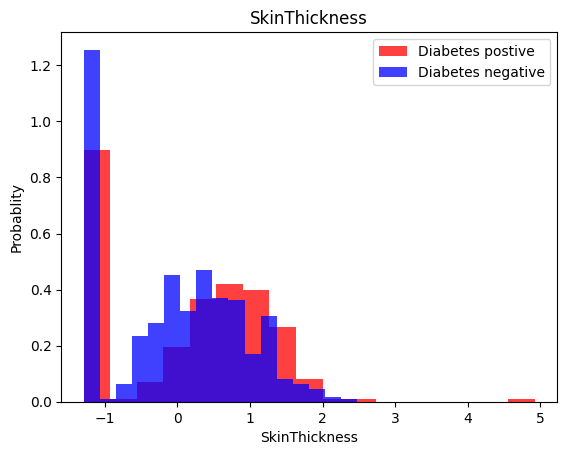

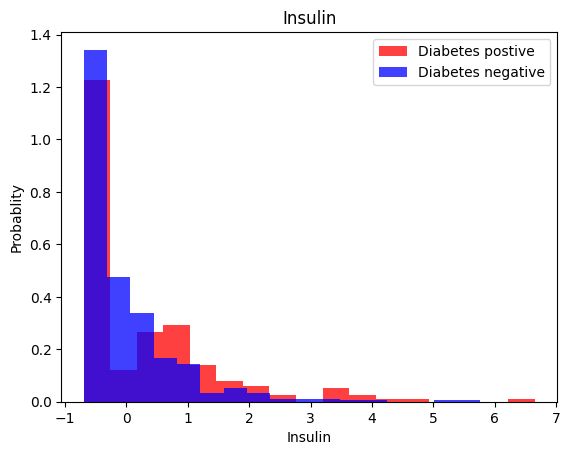

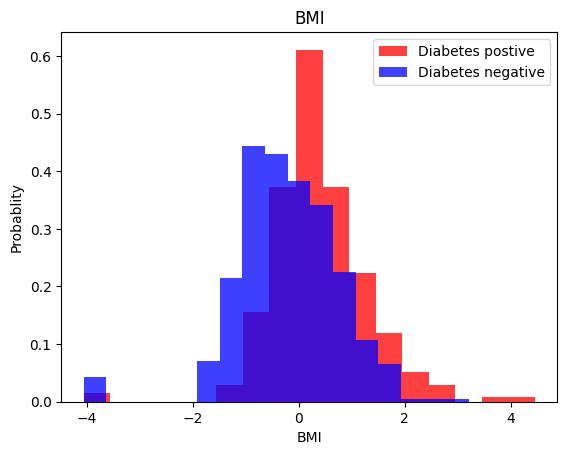

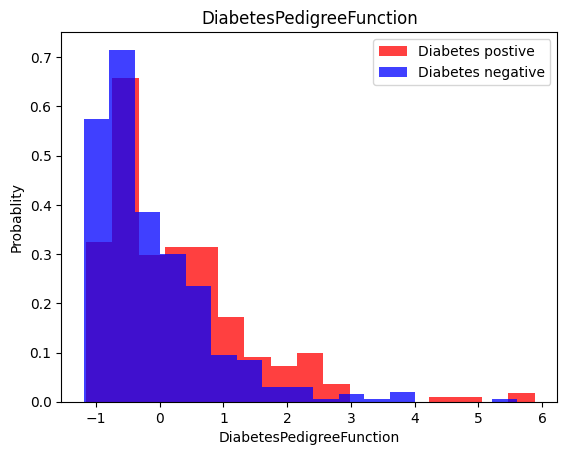

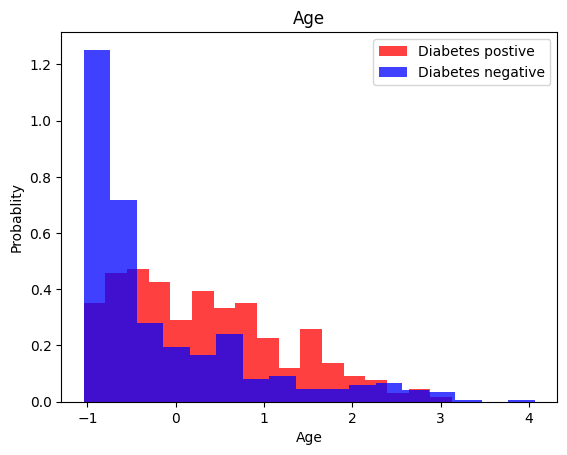

In [ ]:
for i in range(len(df.columns[:-1])):
   label=df.columns[i]
   plt.hist(transformed_df[transformed_df["Outcome"]==1][label],color='red',label='Diabetes postive',alpha=0.75,density=True,bins=17)
   plt.hist(transformed_df[transformed_df["Outcome"]==0][label],color='blue',label='Diabetes negative',alpha=0.75,density=True,bins=17)
   plt.title(label)
   plt.ylabel("Probablity")
   plt.xlabel(label)
   plt.legend()
   plt.show()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])

In [ ]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5633


[0.6976568102836609, 0.5633333325386047]

In [ ]:
model.evaluate(x_valid,y_valid)

5/5 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.5688


[0.6985270380973816, 0.5687500238418579]

In [ ]:
model.fit(x_train,y_train,batch_size=16,epochs=27,validation_data=(x_valid,y_valid))

Epoch 1/27
38/38 [==============================] - 1s 5ms/step - loss: 0.6661 - accuracy: 0.6067 - val_loss: 0.6345 - val_accuracy: 0.6500
Epoch 2/27
38/38 [==============================] - 0s 4ms/step - loss: 0.6198 - accuracy: 0.6617 - val_loss: 0.5986 - val_accuracy: 0.6875
Epoch 3/27
38/38 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.6950 - val_loss: 0.5711 - val_accuracy: 0.6938
Epoch 4/27
38/38 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.7200 - val_loss: 0.5471 - val_accuracy: 0.7063
Epoch 5/27
38/38 [==============================] - 0s 3ms/step - loss: 0.5479 - accuracy: 0.7283 - val_loss: 0.5277 - val_accuracy: 0.7000
Epoch 6/27
38/38 [==============================] - 0s 3ms/step - loss: 0.5325 - accuracy: 0.7417 - val_loss: 0.5115 - val_accuracy: 0.7125
Epoch 7/27
38/38 [==============================] - 0s 5ms/step - loss: 0.5192 - accuracy: 0.7333 - val_loss: 0.5020 - val_accuracy: 0.7250
Epoch 8/27
38/38 [==

In [ ]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.7875


[0.4556370675563812, 0.7875000238418579]